In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_dir = '/content/drive/MyDrive/HDandD Datatset/Hair Diseases - Final'

In [ ]:
test_dir = os.path.join(main_dir, 'test')
train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'val')

In [ ]:
AA_dir = os.path.join(train_dir, 'Alopecia Areata')
CD_dir = os.path.join(train_dir, 'Contact Dermatitis')
F_dir = os.path.join(train_dir, 'Folliculitis')
HL_dir = os.path.join(train_dir, 'Head Lice')
LP_dir = os.path.join(train_dir, 'Lichen Planus')
MPB_dir = os.path.join(train_dir, 'Male Pattern Baldness')
P_dir = os.path.join(train_dir, 'Psoriasis')
SD_dir = os.path.join(train_dir, 'Seborrheic Dermatitis')
TE_dir = os.path.join(train_dir, 'Telogen Effluvium')
TC_dir = os.path.join(train_dir, 'Tinea Capitis')

In [ ]:
print(f'First ten contents of Alopecia Areata are: \n {os.listdir(AA_dir)[0:10]}')

First ten contents of Alopecia Areata are: 
 ['AA_2.jpg', 'AA_3.jpg', 'AA_1.jpg', 'AA_4.jpg', 'AA_7.jpg', 'AA_117.jpg', 'AA_31.jpg', 'AA_105.jpg', 'AA_15.jpg', 'AA_41.jpg']


# Vanilla Model - HDandD Net

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

model_gs = Sequential()
model_gs.add(Conv2D(32, kernel_size = 3, input_shape = (150, 150, 1), activation = 'relu'))
model_gs.add(MaxPooling2D(2,2))
model_gs.add(Conv2D(64, (3,3), activation = 'relu'))
model_gs.add(MaxPooling2D(2,2))
model_gs.add(Conv2D(128, (3,3), activation = 'relu'))
model_gs.add(MaxPooling2D(2,2))
model_gs.add(Conv2D(128, (3,3), activation = 'relu'))
model_gs.add(MaxPooling2D(2,2))
model_gs.add(Flatten())
model_gs.add(Dropout(0.2))
model_gs.add(Dense(512, activation = 'relu'))
model_gs.add(Dense(10, activation = 'softmax'))

model_gs.compile(loss = 'categorical_crossentropy',
                 optimizer = Adam(),
                 metrics = ['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagenerator = IDG(rescale = 1./255)
test_datagenerator = IDG(rescale = 1./255)

train_generator = train_datagenerator.flow_from_directory(train_dir,
                                                          target_size = (150, 150),
                                                          batch_size = 50,
                                                          class_mode = 'categorical',
                                                          color_mode = 'grayscale')

valid_generator = test_datagenerator.flow_from_directory(test_dir,
                                                         target_size = (150, 150),
                                                         batch_size = 50,
                                                         class_mode = 'categorical',
                                                         color_mode = 'grayscale')

Found 5000 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [ ]:
# Sanity check
for data_batch, labels_batch in train_generator:
    print('data_batch shape: ', data_batch.shape)
    print('labels_batch shape', labels_batch.shape)
    break

data_batch shape:  (50, 150, 150, 1)
labels_batch shape (50, 10)


In [ ]:
history = model_gs.fit(train_generator,
                       epochs = 30,
                       validation_data = valid_generator)

Epoch 1/30
100/100 [==============================] - 3318s 33s/step - loss: 1.9347 - acc: 0.2982 - val_loss: 1.5829 - val_acc: 0.4375
Epoch 2/30
100/100 [==============================] - 45s 452ms/step - loss: 1.3263 - acc: 0.5258 - val_loss: 1.1331 - val_acc: 0.6225
Epoch 3/30
100/100 [==============================] - 46s 460ms/step - loss: 0.8646 - acc: 0.6952 - val_loss: 0.8250 - val_acc: 0.7158
Epoch 4/30
100/100 [==============================] - 45s 447ms/step - loss: 0.5285 - acc: 0.8248 - val_loss: 0.6698 - val_acc: 0.8033
Epoch 5/30
100/100 [==============================] - 44s 445ms/step - loss: 0.3341 - acc: 0.8882 - val_loss: 0.5352 - val_acc: 0.8550
Epoch 6/30
100/100 [==============================] - 45s 449ms/step - loss: 0.2761 - acc: 0.9070 - val_loss: 0.5420 - val_acc: 0.8500
Epoch 7/30
100/100 [==============================] - 48s 480ms/step - loss: 0.1773 - acc: 0.9412 - val_loss: 0.6012 - val_acc: 0.8675
Epoch 8/30
100/100 [==============================] - 4

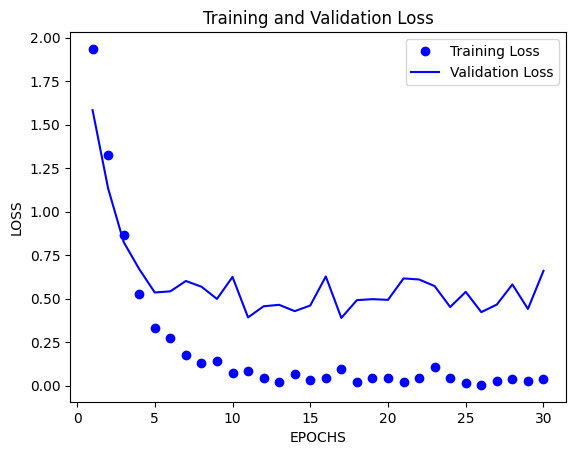

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

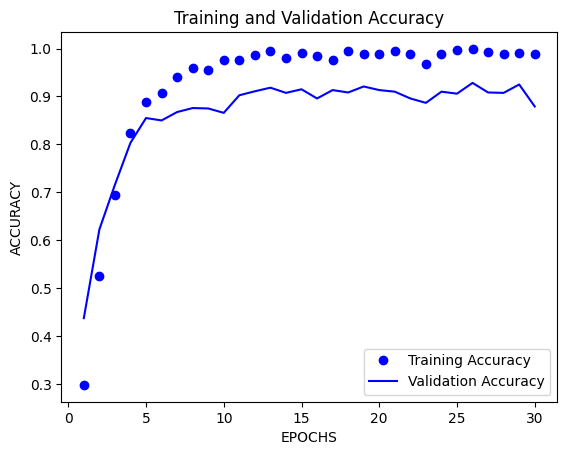

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagenerator.flow_from_directory(test_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical',
                                                        color_mode = 'grayscale')

Found 1200 images belonging to 10 classes.


In [ ]:
test_loss, test_acc = model_gs.evaluate(test_generator)

24/24 [==============================] - 8s 324ms/step - loss: 0.6596 - acc: 0.8792


In [ ]:
model_gs.save("HDandD Net - Vanilla.h5")

# VGG19

In [ ]:
vgg_train_generator = train_datagenerator.flow_from_directory(train_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

vgg_valid_generator = test_datagenerator.flow_from_directory(val_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

vgg_test_generator = test_datagenerator.flow_from_directory(test_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [ ]:
from keras.applications import VGG19

vgg_base = VGG19(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

vgg_model = Sequential()
vgg_model.add(vgg_base)
vgg_model.add(Flatten())
vgg_model.add(Dense(10, activation = 'softmax'))
vgg_model.summary()

print(f'Trainable weights before freezing: {len(vgg_model.trainable_weights)}')
vgg_base.trainable = False
print(f'Trainable weights after freezing: {len(vgg_model.trainable_weights)}')

vgg_model.compile(optimizer = Adam(),
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                81930     
                                                                 
Total params: 20,106,314
Trainable params: 20,106,314
Non-trainable params: 0
_________________________________________________________________
Trainable weights before freezing: 34
Trainable weights after freezing: 2


In [ ]:
history_vgg = vgg_model.fit(vgg_train_generator,
                            steps_per_epoch = 25,
                            epochs = 30,
                            validation_data = vgg_valid_generator,
                            validation_steps = 25)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 1.9624 - acc: 0.3248 

25/25 [==============================] - 1605s 66s/step - loss: 1.9624 - acc: 0.3248 - val_loss: 1.5802 - val_acc: 0.4350
Epoch 2/30
25/25 [==============================] - 581s 23s/step - loss: 1.3340 - acc: 0.5640
Epoch 3/30
25/25 [==============================] - 434s 17s/step - loss: 1.0856 - acc: 0.6632
Epoch 4/30
25/25 [==============================] - 318s 13s/step - loss: 0.9674 - acc: 0.7048
Epoch 5/30
25/25 [==============================] - 224s 9s/step - loss: 0.7917 - acc: 0.7880
Epoch 6/30
25/25 [==============================] - 180s 7s/step - loss: 0.6827 - acc: 0.8296
Epoch 7/30
25/25 [==============================] - 143s 6s/step - loss: 0.6304 - acc: 0.8448
Epoch 8/30
25/25 [==============================] - 96s 4s/step - loss: 0.5367 - acc: 0.8856
Epoch 9/30
25/25 [==============================] - 83s 3s/step - loss: 0.5274 - acc: 0.8864
Epoch 10/30
25/25 [==============================] - 55s 2s/step - loss: 0.4723 - acc: 0.9000
Epoch 11/30
25/25 [============

In [ ]:
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(vgg_test_generator)

24/24 [==============================] - 601s 26s/step - loss: 0.2787 - acc: 0.9350


In [ ]:
vgg_model.save('VGG Model - HDandD Net.h5')

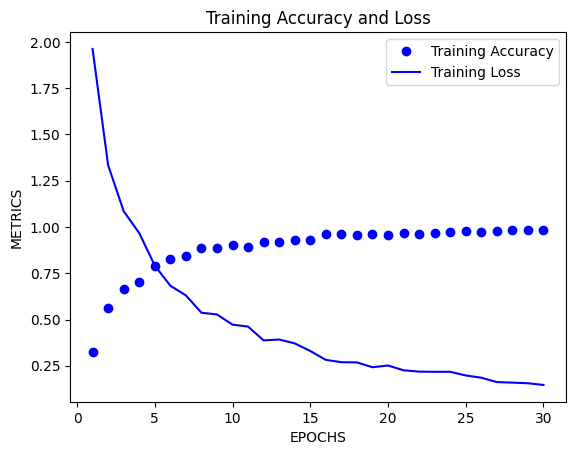

In [ ]:
import matplotlib.pyplot as plt

history_dict = history_vgg.history

acc_values = history_dict['acc']
loss_values = history_dict['loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training Accuracy')
plt.plot(epochs, loss_values, 'b', label = 'Training Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('EPOCHS')
plt.ylabel('METRICS')
plt.legend()
plt.show()

# InceptionNet V3

In [ ]:
from keras.applications import InceptionV3

incep_base = InceptionV3(weights = 'imagenet',
                         include_top = False,
                         input_shape = (150,150, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import optimizer

incep_model = Sequential()
incep_model.add(incep_base)
incep_model.add(Flatten())
incep_model.add(Dense(512, activation = 'relu'))
incep_model.add(Dropout(0.2))
incep_model.add(Dense(128, activation = 'relu'))
incep_model.add(Dropout(0.2))
incep_model.add(Dense(10, activation = 'softmax'))
print(f'The number of trainable weights before freezing the base = {len(incep_model.trainable_weights)}')
incep_base.trainable = False
print(f'The number of trainable weights after freezing the base = {len(incep_model.trainable_weights)}')

The number of trainable weights before freezing the base = 194
The number of trainable weights after freezing the base = 6


In [ ]:
incep_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_15 (Dense)            (None, 512)               9437696   
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)               

In [ ]:
from keras.preprocessing.image import ImageDataGenerator as IDG

train_datagenerator = IDG(rescale = 1./255)
test_datagenerator = IDG(rescale = 1./255)

incep_train_generator = train_datagenerator.flow_from_directory(train_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

incep_valid_generator = test_datagenerator.flow_from_directory(val_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

incep_test_generator = test_datagenerator.flow_from_directory(test_dir,
                                                        target_size = (150,150),
                                                        batch_size = 50,
                                                        class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [ ]:
from keras.optimizers import Adam
incep_model.compile(optimizer = Adam(),
                    loss = 'categorical_crossentropy',
                    metrics = ['acc'])

In [ ]:
history_incep = incep_model.fit(incep_train_generator,
                                steps_per_epoch = 100,
                                epochs = 15,
                                validation_data = incep_valid_generator,
                                validation_steps = 100)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 3.3144 - acc: 0.3236 

100/100 [==============================] - 1854s 18s/step - loss: 3.3144 - acc: 0.3236 - val_loss: 1.0789 - val_acc: 0.6600
Epoch 2/15
100/100 [==============================] - 38s 376ms/step - loss: 0.9646 - acc: 0.6784
Epoch 3/15
100/100 [==============================] - 36s 359ms/step - loss: 0.4676 - acc: 0.8494
Epoch 4/15
100/100 [==============================] - 37s 369ms/step - loss: 0.3159 - acc: 0.9042
Epoch 5/15
100/100 [==============================] - 37s 368ms/step - loss: 0.2194 - acc: 0.9318
Epoch 6/15
100/100 [==============================] - 36s 362ms/step - loss: 0.2016 - acc: 0.9372
Epoch 7/15
100/100 [==============================] - 37s 373ms/step - loss: 0.1574 - acc: 0.9514
Epoch 8/15
100/100 [==============================] - 36s 364ms/step - loss: 0.1568 - acc: 0.9524
Epoch 9/15
100/100 [==============================] - 36s 363ms/step - loss: 0.1325 - acc: 0.9606
Epoch 10/15
100/100 [==============================] - 37s 366ms/step - loss: 0.1573 - acc: 

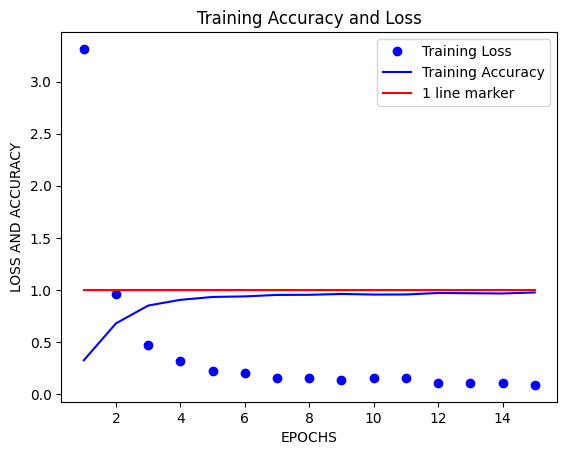

In [ ]:
import matplotlib.pyplot as plt

history_dict = history_incep.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(loss_values) + 1)

marker = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, marker, 'r', label = '1 line marker')
plt.title('Training Accuracy and Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS AND ACCURACY')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = incep_model.evaluate(incep_test_generator)

24/24 [==============================] - 352s 15s/step - loss: 0.1631 - acc: 0.9558


In [ ]:
incep_model.save('InceptionNet V3 - HDandD Net.h5')